In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 12

In [2]:
import xarray as xr

import xarray_sentinel

/Users/devseed/Documents/repos/eopf-101/.venv/lib/python3.13/site-packages/xarray_sentinel/esa_safe.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [3]:
# uncomment download the data
#! DHUS_USER=<user> DHUS_PASSWORD=<password> ./download_data.sh

In [4]:
product_path = (
    "data/S1B_IW_GRDH_1SDV_20211223T051122_20211223T051147_030148_039993_5371.SAFE"
)
swath_group = "IW"
swath_polarisation_group = "IW/VV"
measurement_group = "IW/VV"
measurement_block_slices = (slice(7000, 9000), slice(20000, 23000))
digital_number_max = 600

!ls -d {product_path}

ls: data/S1B_IW_GRDH_1SDV_20211223T051122_20211223T051147_030148_039993_5371.SAFE: No such file or directory


In [5]:
#xr.open_dataset(product_path, engine="sentinel-1")

In [6]:
#xr.open_dataset(product_path, engine="sentinel-1", group=swath_group)

In [8]:
#xr.open_dataset(product_path, engine="sentinel-1", group=swath_polarisation_group)

In [9]:
#measurement = xr.open_dataset(
#    product_path, engine="sentinel-1", group=measurement_group, chunks=2048
#)
#measurement

In [10]:
#measurement_block = measurement.measurement[measurement_block_slices]
#measurement_block

In [7]:
DATASET_URL = "https://objects.eodc.eu/e05ab01a9d56408d82ac32d69a5aae2a:202506-s01siwgrh/29/products/cpm_v256/S1C_IW_GRDH_1SDV_20250629T051050_20250629T051115_002993_006192_2985.zarr"
# os.environ["AWS_ENDPOINT_URL"] = "https://objectstore.eodc.eu:2222"
dt = xr.open_datatree(DATASET_URL, engine="zarr", chunks={})
for i in sorted(dt.groups):
    print(i)

/
/S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH
/S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions
/S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions/antenna_pattern
/S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions/attitude
/S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions/azimuth_fm_rate
/S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions/coordinate_conversion
/S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions/doppler_centroid
/S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions/gcp
/S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions/orbit
/S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions/reference_replica
/S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions/replica
/S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions/terrain_height
/S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/measurements
/S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/quali

In [8]:
dt

<xarray.DataTree>
Group: /
│   Attributes:
│       other_metadata:  {'azimuth_steering_rate': 0.0, 'eopf_category': 'eoconta...
│       stac_discovery:  {'assets': {}, 'bbox': [15.411782, 41.221558, 11.873758,...
├── Group: /S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH
│   │   Attributes:
│   │       other_metadata:  {'azimuth_steering_rate': 0.0, 'downlink_information': {...
│   │       stac_discovery:  {'assets': {}, 'bbox': [15.411782, 41.221558, 11.873758,...
│   ├── Group: /S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions
│   │   ├── Group: /S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions/antenna_pattern
│   │   │       Dimensions:           (azimuth_time: 27, slant_range_time: 728)
│   │   │       Coordinates:
│   │   │         * azimuth_time      (azimuth_time) datetime64[ns] 216B 2025-06-29T05:10:51....
│   │   │           slant_range_time  (azimuth_time, slant_range_time) float64 157kB dask.array<chunksize=(27, 728), meta=np.ndarray>
│   │   │       Data variables:
│   │   │           elevation_angle   (azimuth_time, slant_range_time) float32 79kB dask.array<chunksize=(27, 728), meta=np.ndarray>
│   │   │           incidence_angle   (azimuth_time, slant_range_time) float32 79kB dask.array<chunksize=(27, 728), meta=np.ndarray>
│   │   │           roll              (azimuth_time) float64 216B dask.array<chunksize=(27,), meta=np.ndarray>
│   │   │           terrain_height    (azimuth_time) float64 216B dask.array<chunksize=(27,), meta=np.ndarray>
│   │   ├── Group: /S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions/attitude
│   │   │       Dimensions:       (azimuth_time: 25)
│   │   │       Coordinates:
│   │   │         * azimuth_time  (azimuth_time) datetime64[ns] 200B 2025-06-29T05:10:51.0000...
│   │   │       Data variables:
│   │   │           pitch         (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           q0            (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           q1            (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           q2            (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           q3            (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           roll          (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           wx            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           wy            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           wz            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           yaw           (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   ├── Group: /S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions/azimuth_fm_rate
│   │   │       Dimensions:                     (azimuth_time: 10, degree: 3)
│   │   │       Coordinates:
│   │   │         * azimuth_time                (azimuth_time) datetime64[ns] 80B 2025-06-29T...
│   │   │       Dimensions without coordinates: degree
│   │   │       Data variables:
│   │   │           azimuth_fm_rate_polynomial  (azimuth_time, degree) float64 240B dask.array<chunksize=(10, 3), meta=np.ndarray>
│   │   │           t0                          (azimuth_time) float64 80B dask.array<chunksize=(10,), meta=np.ndarray>
│   │   ...
│   │   ├── Group: /S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions/reference_replica
│   │   │       Dimensions:                                   (azimuth_time: 3, degree: 4)
│   │   │       Coordinates:
│   │   │         * azimuth_time                              (azimuth_time) datetime64[ns] 24B ...
│   │   │       Dimensions without coordinates: degree
│   │   │       Data variables:
│   │   │           reference_replica_amplitude_coefficient

In [9]:
measurement_block = dt["S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/measurements"].to_dataset()
measurement_block

<xarray.Dataset> Size: 888MB
Dimensions:       (azimuth_time: 16679, ground_range: 26612)
Coordinates:
  * azimuth_time  (azimuth_time) uint16 33kB 52568 44137 35707 ... 35334 26904
Dimensions without coordinates: ground_range
Data variables:
    grd           (azimuth_time, ground_range) uint16 888MB dask.array<chunksize=(5043, 26612), meta=np.ndarray>

In [10]:
# NOT WORKING YET, FIX IT LATER

#dn = abs(measurement_block).isel(
#    azimuth_time=slice(None, None, 10), ground_range=slice(None, None, 10)
#).to_dataarray()
#dn.plot(
#    y="azimuth_time"
#)

In [11]:
#_ = abs(measurement_block).plot(y="azimuth_time", vmax=digital_number_max)

In [12]:
#gcp = xr.open_dataset(
#    product_path, engine="sentinel-1", group=f"{swath_polarisation_group}/gcp"
#)
#gcp

In [15]:
gcp = dt["S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions/gcp"].to_dataset()
gcp

<xarray.Dataset> Size: 13kB
Dimensions:           (azimuth_time: 210)
Coordinates:
  * azimuth_time      (azimuth_time) datetime64[ns] 2kB 2025-06-29T05:10:50.9...
    line              (azimuth_time) uint32 840B dask.array<chunksize=(210,), meta=np.ndarray>
Data variables:
    elevation_angle   (azimuth_time) float64 2kB dask.array<chunksize=(210,), meta=np.ndarray>
    height            (azimuth_time) float64 2kB dask.array<chunksize=(210,), meta=np.ndarray>
    incidence_angle   (azimuth_time) float64 2kB dask.array<chunksize=(210,), meta=np.ndarray>
    latitude          (azimuth_time) float64 2kB dask.array<chunksize=(210,), meta=np.ndarray>
    longitude         (azimuth_time) float64 2kB dask.array<chunksize=(210,), meta=np.ndarray>
    pixel             (azimuth_time) uint32 840B dask.array<chunksize=(210,), meta=np.ndarray>
    slant_range_time  (azimuth_time) float64 2kB dask.array<chunksize=(210,), meta=np.ndarray>

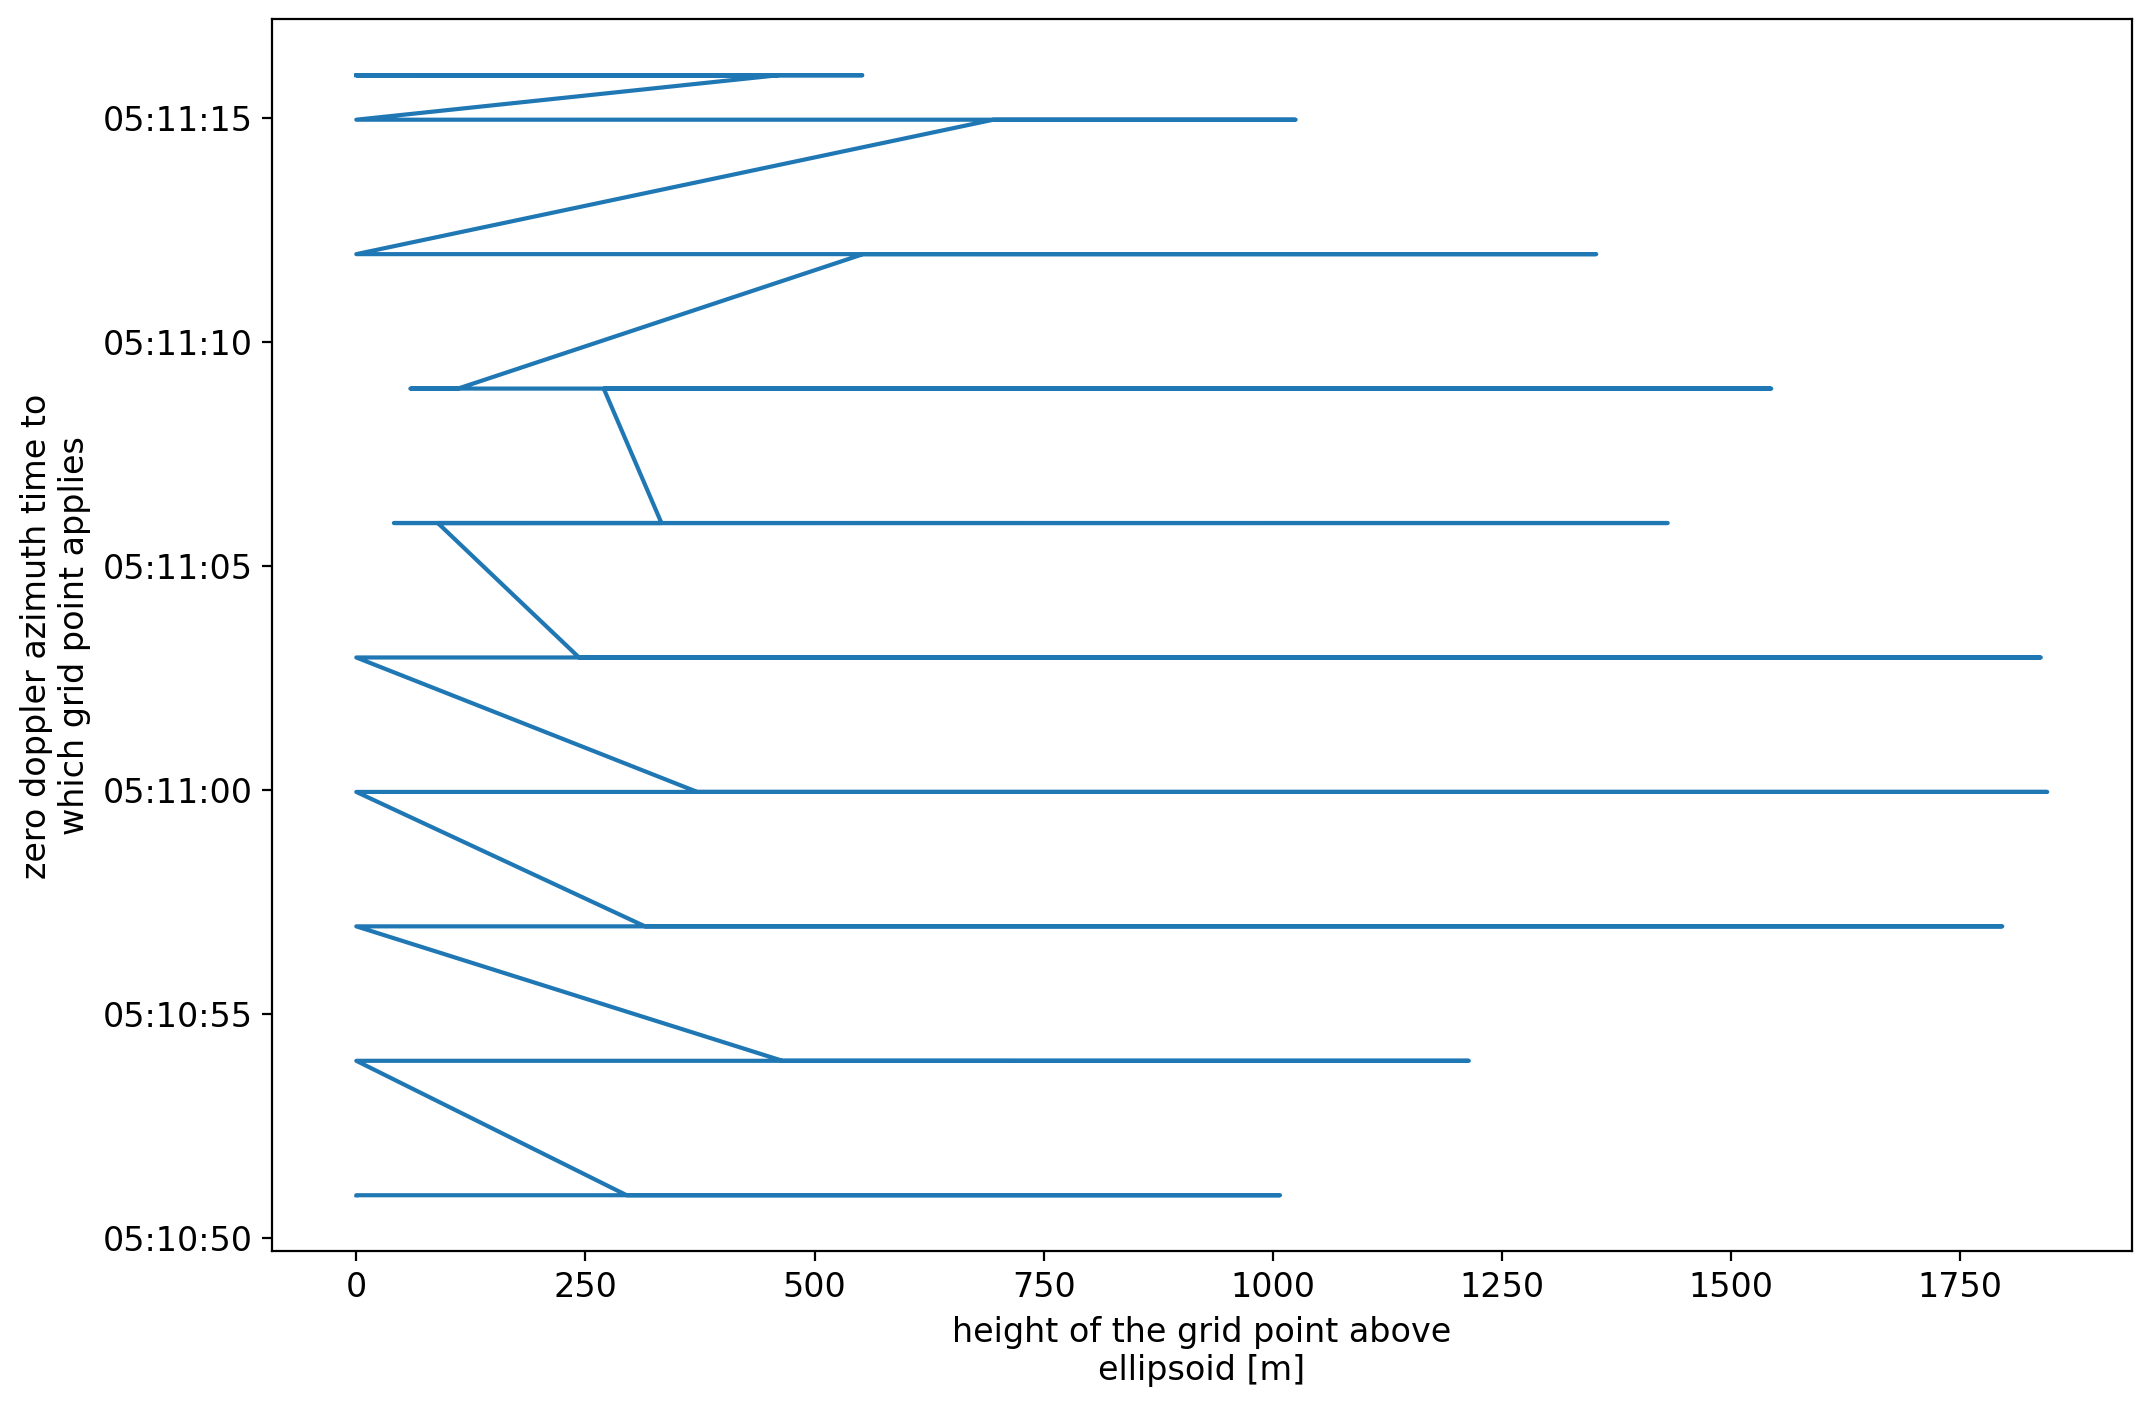

In [38]:
_ = gcp.height.plot(y="azimuth_time")

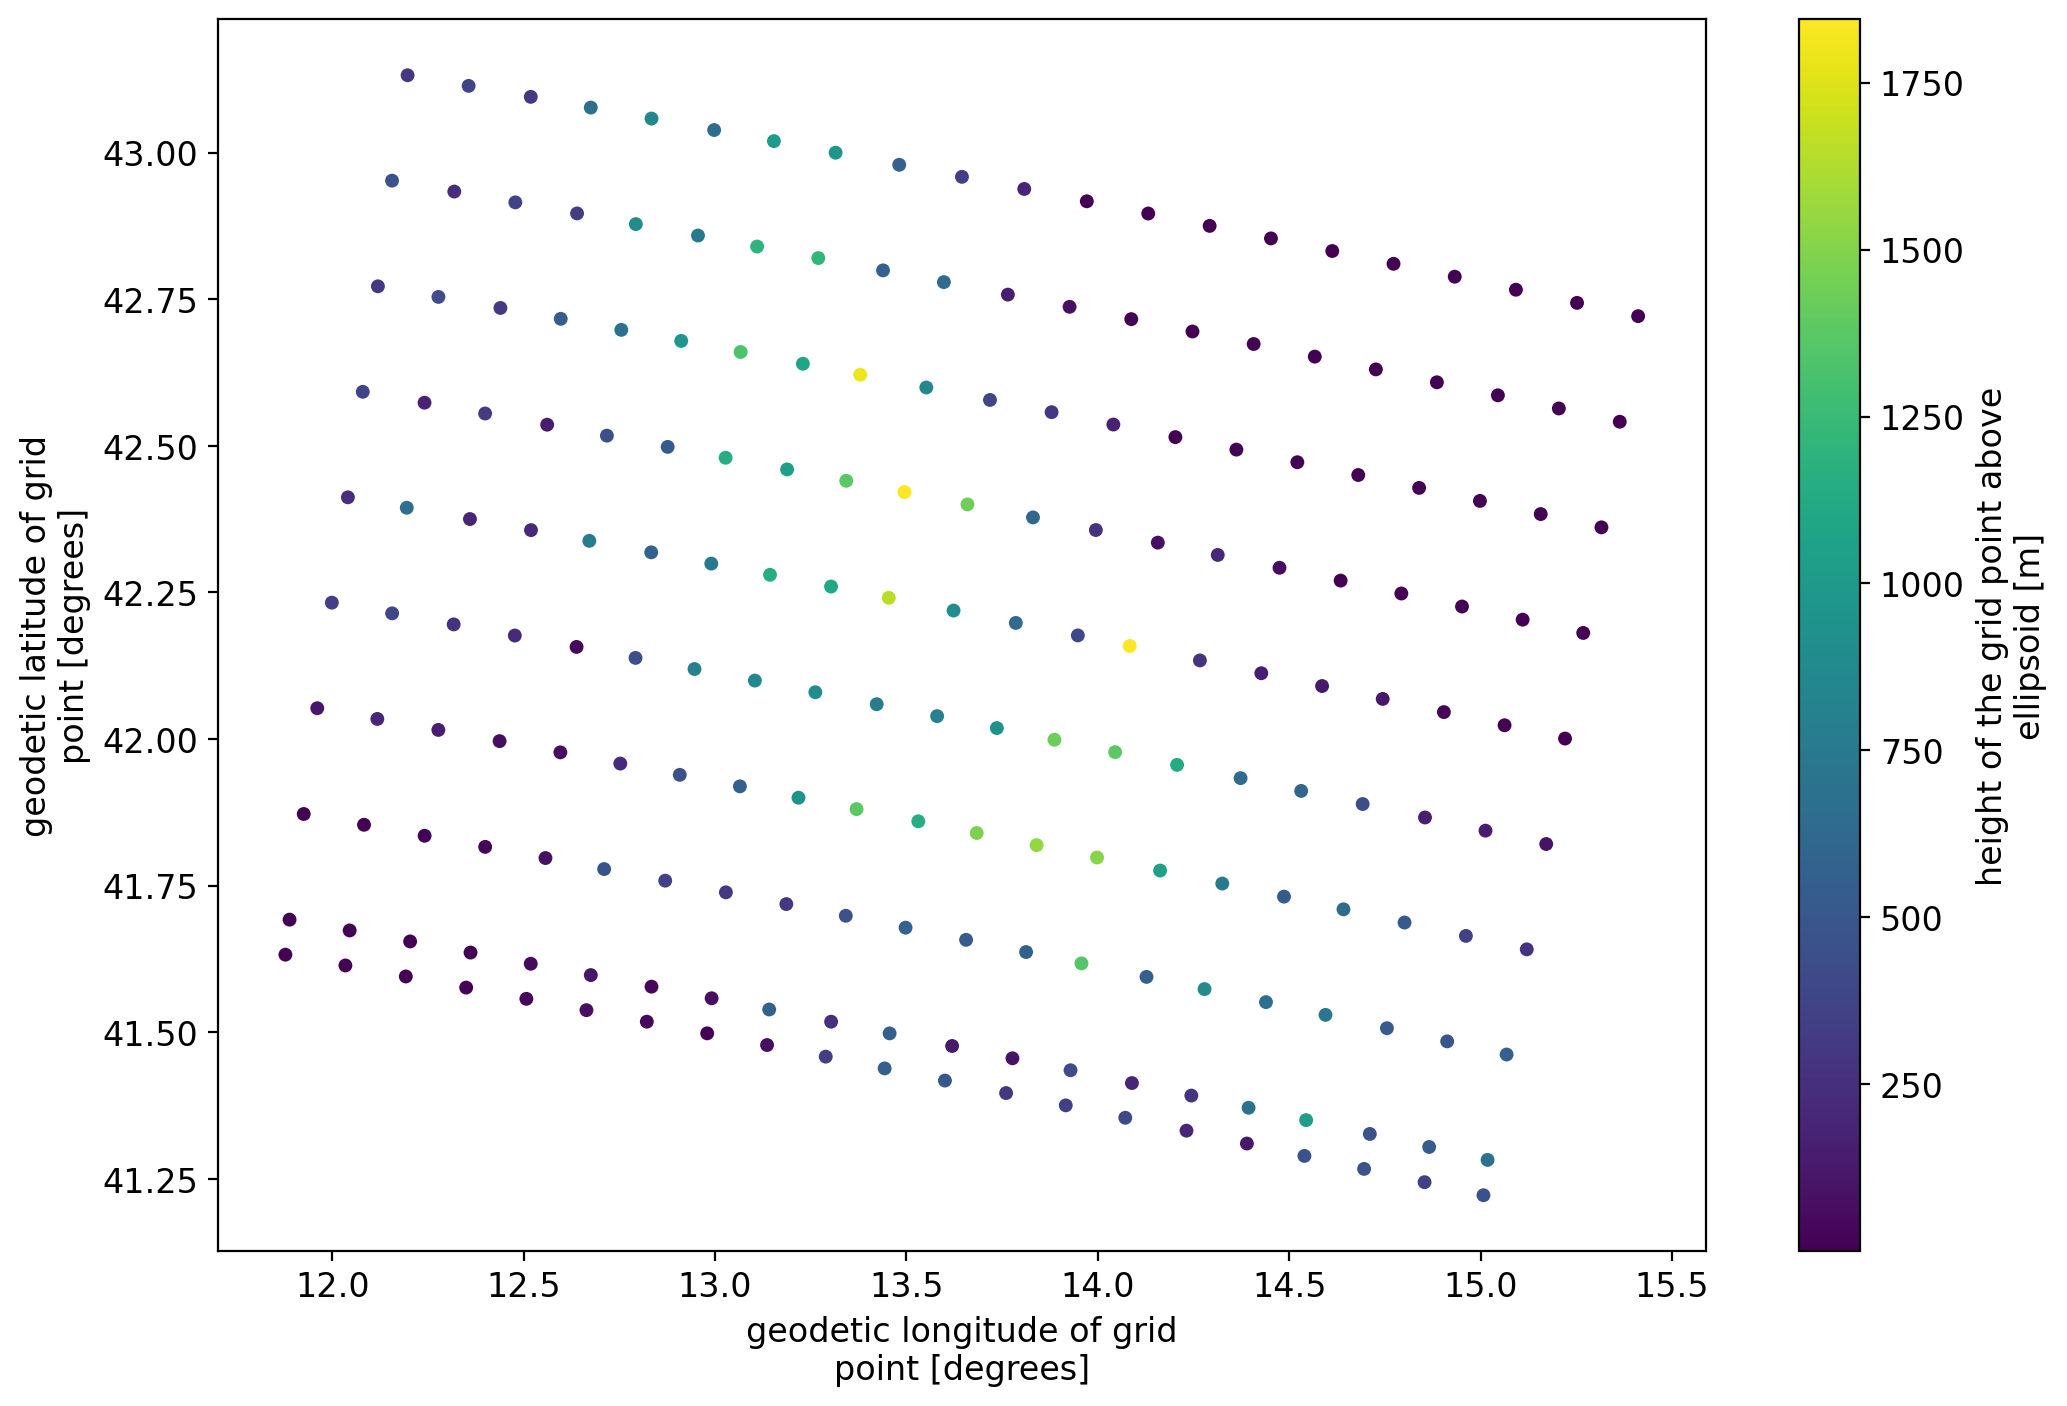

In [39]:
_ = gcp.plot.scatter(x="longitude", y="latitude", hue="height")

In [16]:
# orbit = xr.open_dataset(
#    product_path, engine="sentinel-1", group=f"{swath_polarisation_group}/orbit"
# )
# orbit

In [17]:
orbit = dt["S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions/orbit"].to_dataset()
orbit

<xarray.Dataset> Size: 896B
Dimensions:       (azimuth_time: 16, axis: 3)
Coordinates:
  * azimuth_time  (azimuth_time) datetime64[ns] 128B 2025-06-29T05:09:49.7070...
Dimensions without coordinates: axis
Data variables:
    position      (azimuth_time, axis) float64 384B dask.array<chunksize=(16, 3), meta=np.ndarray>
    velocity      (azimuth_time, axis) float64 384B dask.array<chunksize=(16, 3), meta=np.ndarray>

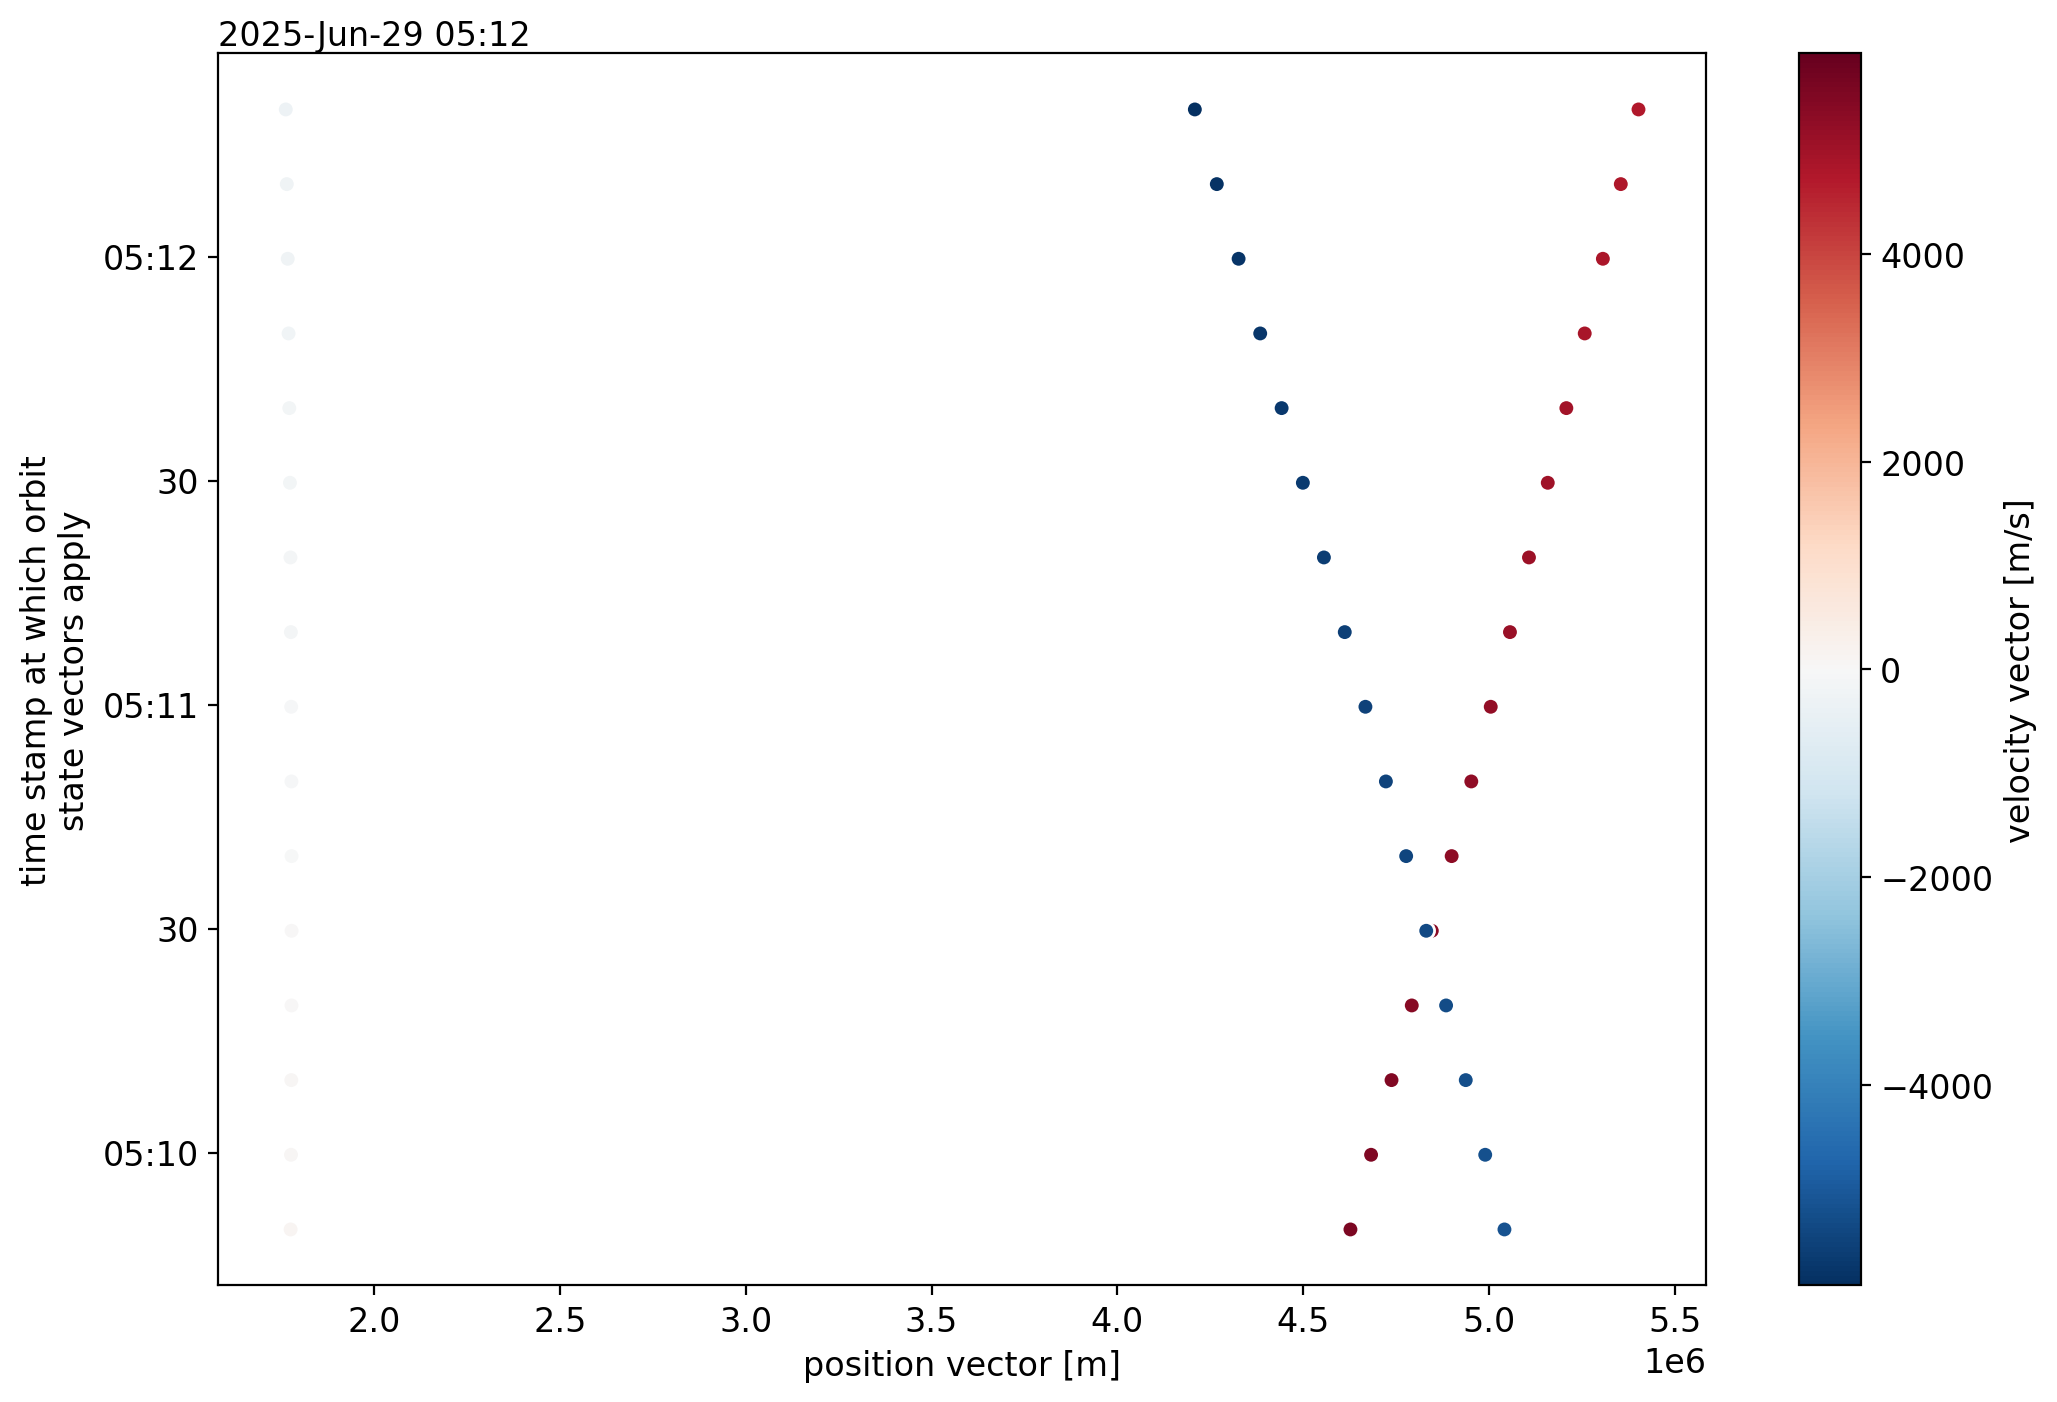

In [18]:
orbit.plot.scatter(y="azimuth_time", x="position", hue="velocity")

In [19]:
# calibration = xr.open_dataset(
#     product_path, engine="sentinel-1", group=f"{swath_polarisation_group}/calibration"
# )
# calibration

In [20]:
calibration = dt["S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/quality/calibration"].to_dataset()
calibration

<xarray.Dataset> Size: 296kB
Dimensions:       (azimuth_time: 27, ground_range: 667)
Coordinates:
  * azimuth_time  (azimuth_time) datetime64[ns] 216B 2025-06-29T05:10:50.9484...
  * ground_range  (ground_range) float64 5kB 0.0 6.671e+06 ... 4.438e+09
    line          (azimuth_time) uint32 108B dask.array<chunksize=(27,), meta=np.ndarray>
    pixel         (ground_range) uint32 3kB dask.array<chunksize=(667,), meta=np.ndarray>
Data variables:
    beta_nought   (azimuth_time, ground_range) float32 72kB dask.array<chunksize=(27, 667), meta=np.ndarray>
    dn            (azimuth_time, ground_range) float32 72kB dask.array<chunksize=(27, 667), meta=np.ndarray>
    gamma         (azimuth_time, ground_range) float32 72kB dask.array<chunksize=(27, 667), meta=np.ndarray>
    sigma_nought  (azimuth_time, ground_range) float32 72kB dask.array<chunksize=(27, 667), meta=np.ndarray>

In [21]:
# betaNought and dn calibration are typically constant
print(calibration.beta_nought.mean().as_numpy().item(), "+-", calibration.beta_nought.std().as_numpy().item())
print(calibration.dn.mean().as_numpy().item(), "+-", calibration.dn.std().as_numpy().item())

449.5509948730469 +- 1.0470260349393357e-05
474.0 +- 0.0


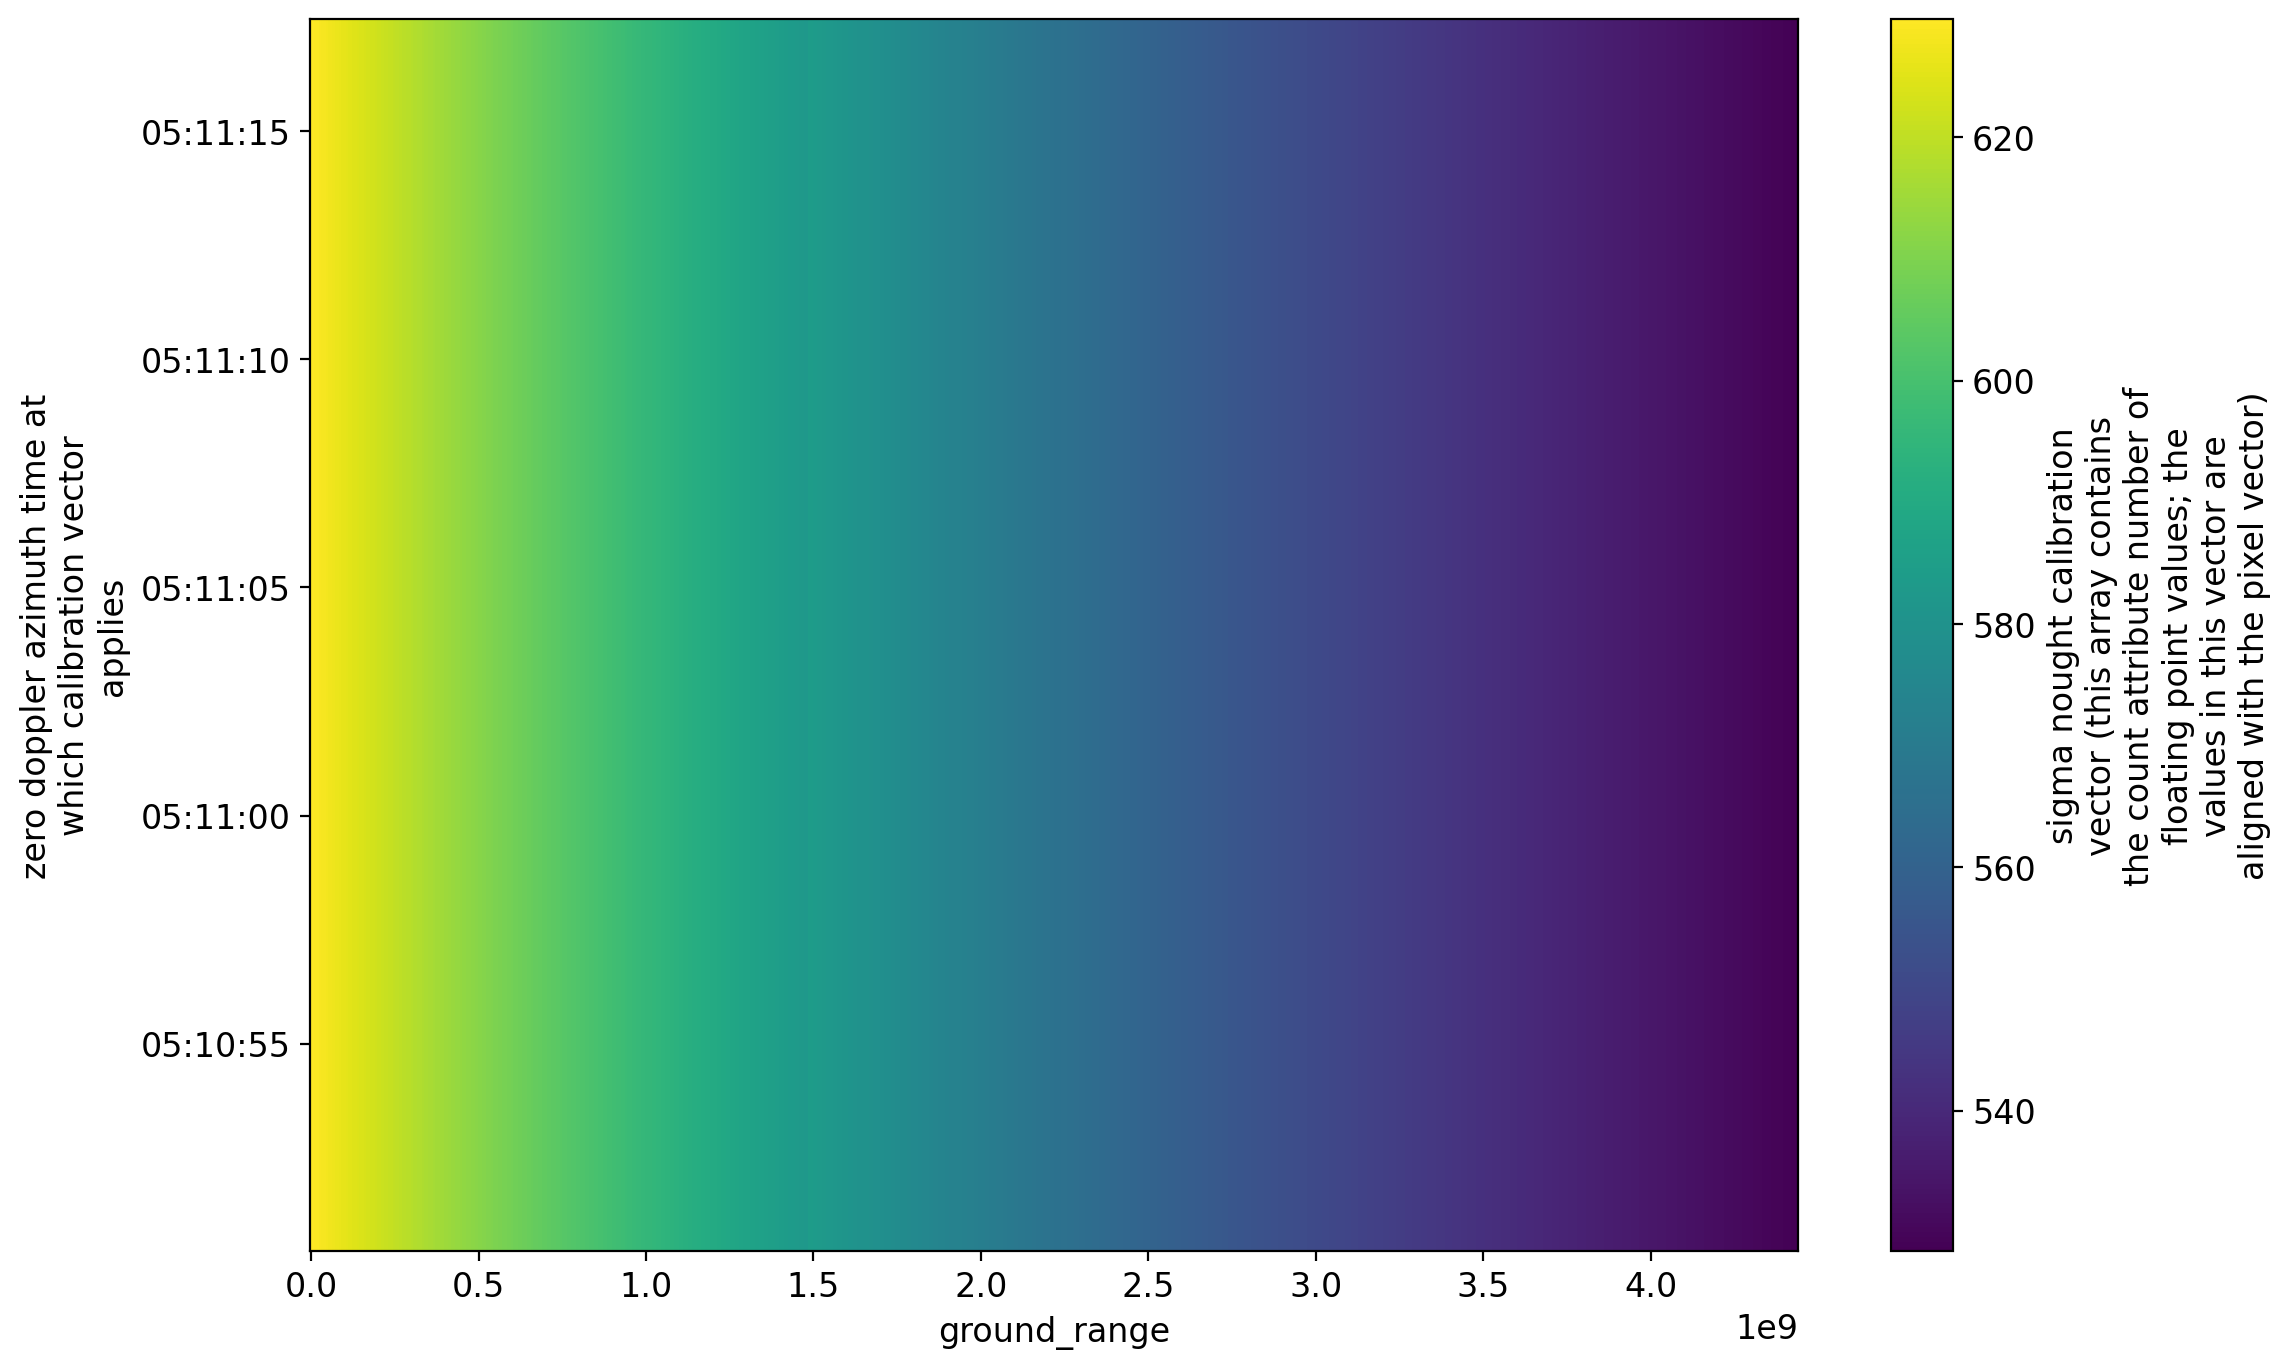

In [22]:
_ = calibration.sigma_nought.plot(x="ground_range")

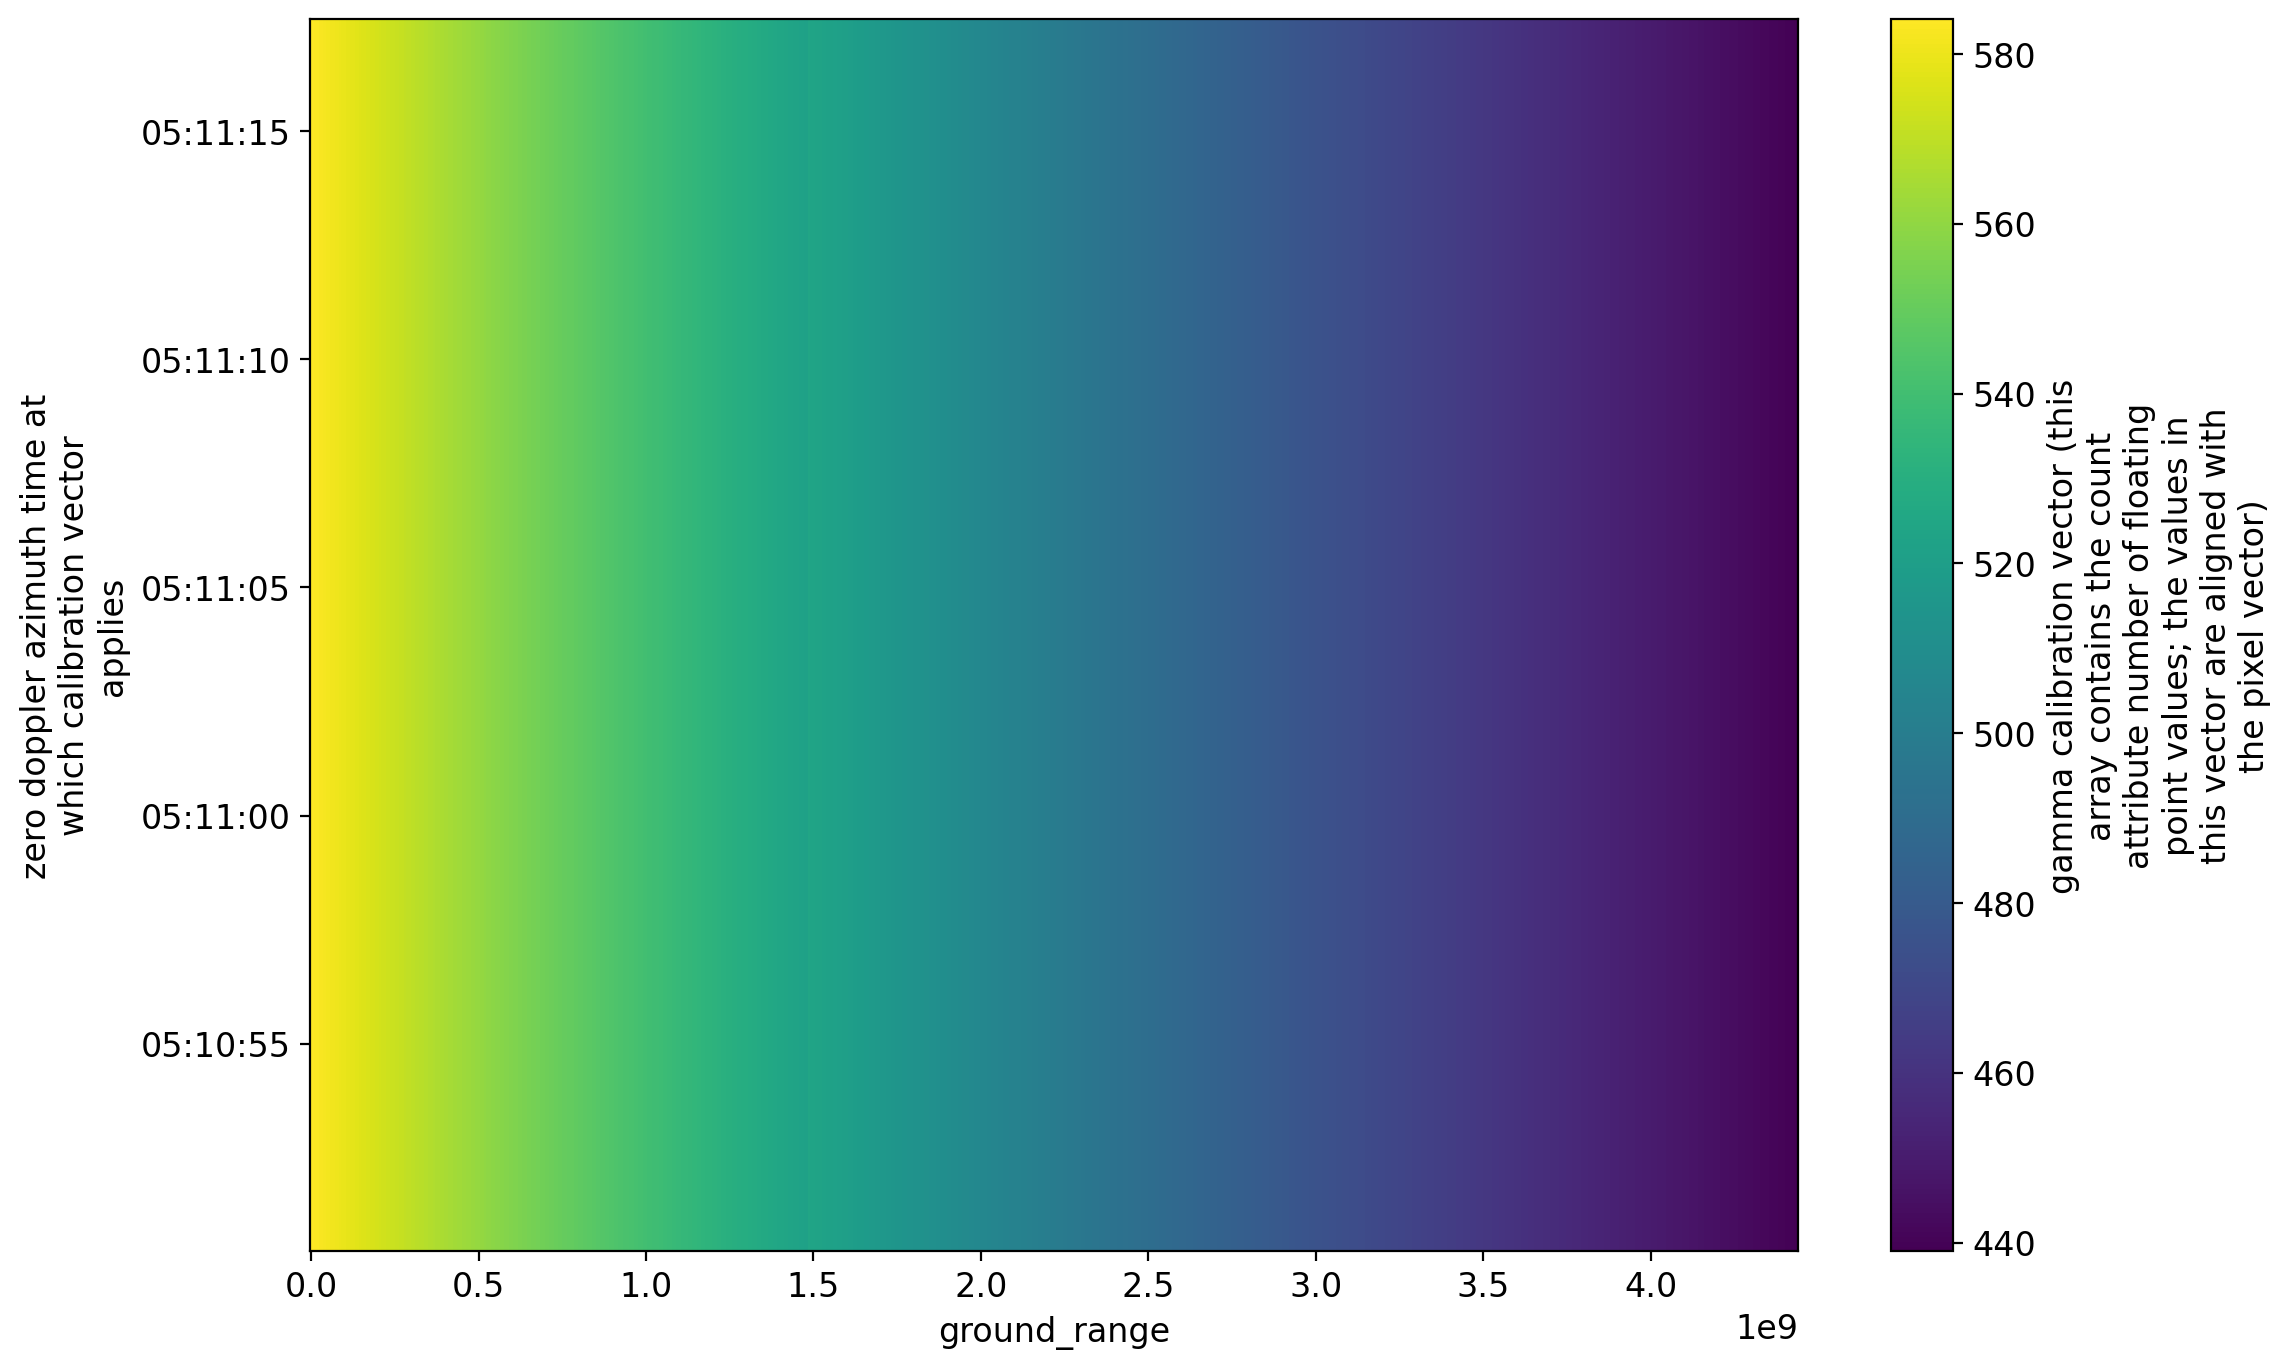

In [23]:
_ = calibration.gamma.plot(x="ground_range")

In [24]:
betaNought_block = xarray_sentinel.calibrate_amplitude(
    measurement_block, calibration.beta_nought
)
betaNought_block

<xarray.Dataset> Size: 2GB
Dimensions:       (azimuth_time: 16679, ground_range: 26612)
Coordinates:
  * azimuth_time  (azimuth_time) uint16 33kB 52568 44137 35707 ... 35334 26904
Dimensions without coordinates: ground_range
Data variables:
    grd           (azimuth_time, ground_range) float32 2GB dask.array<chunksize=(5043, 26612), meta=np.ndarray>
Attributes:
    long_name:  amplitude for beta nought calibration vector (this array cont...

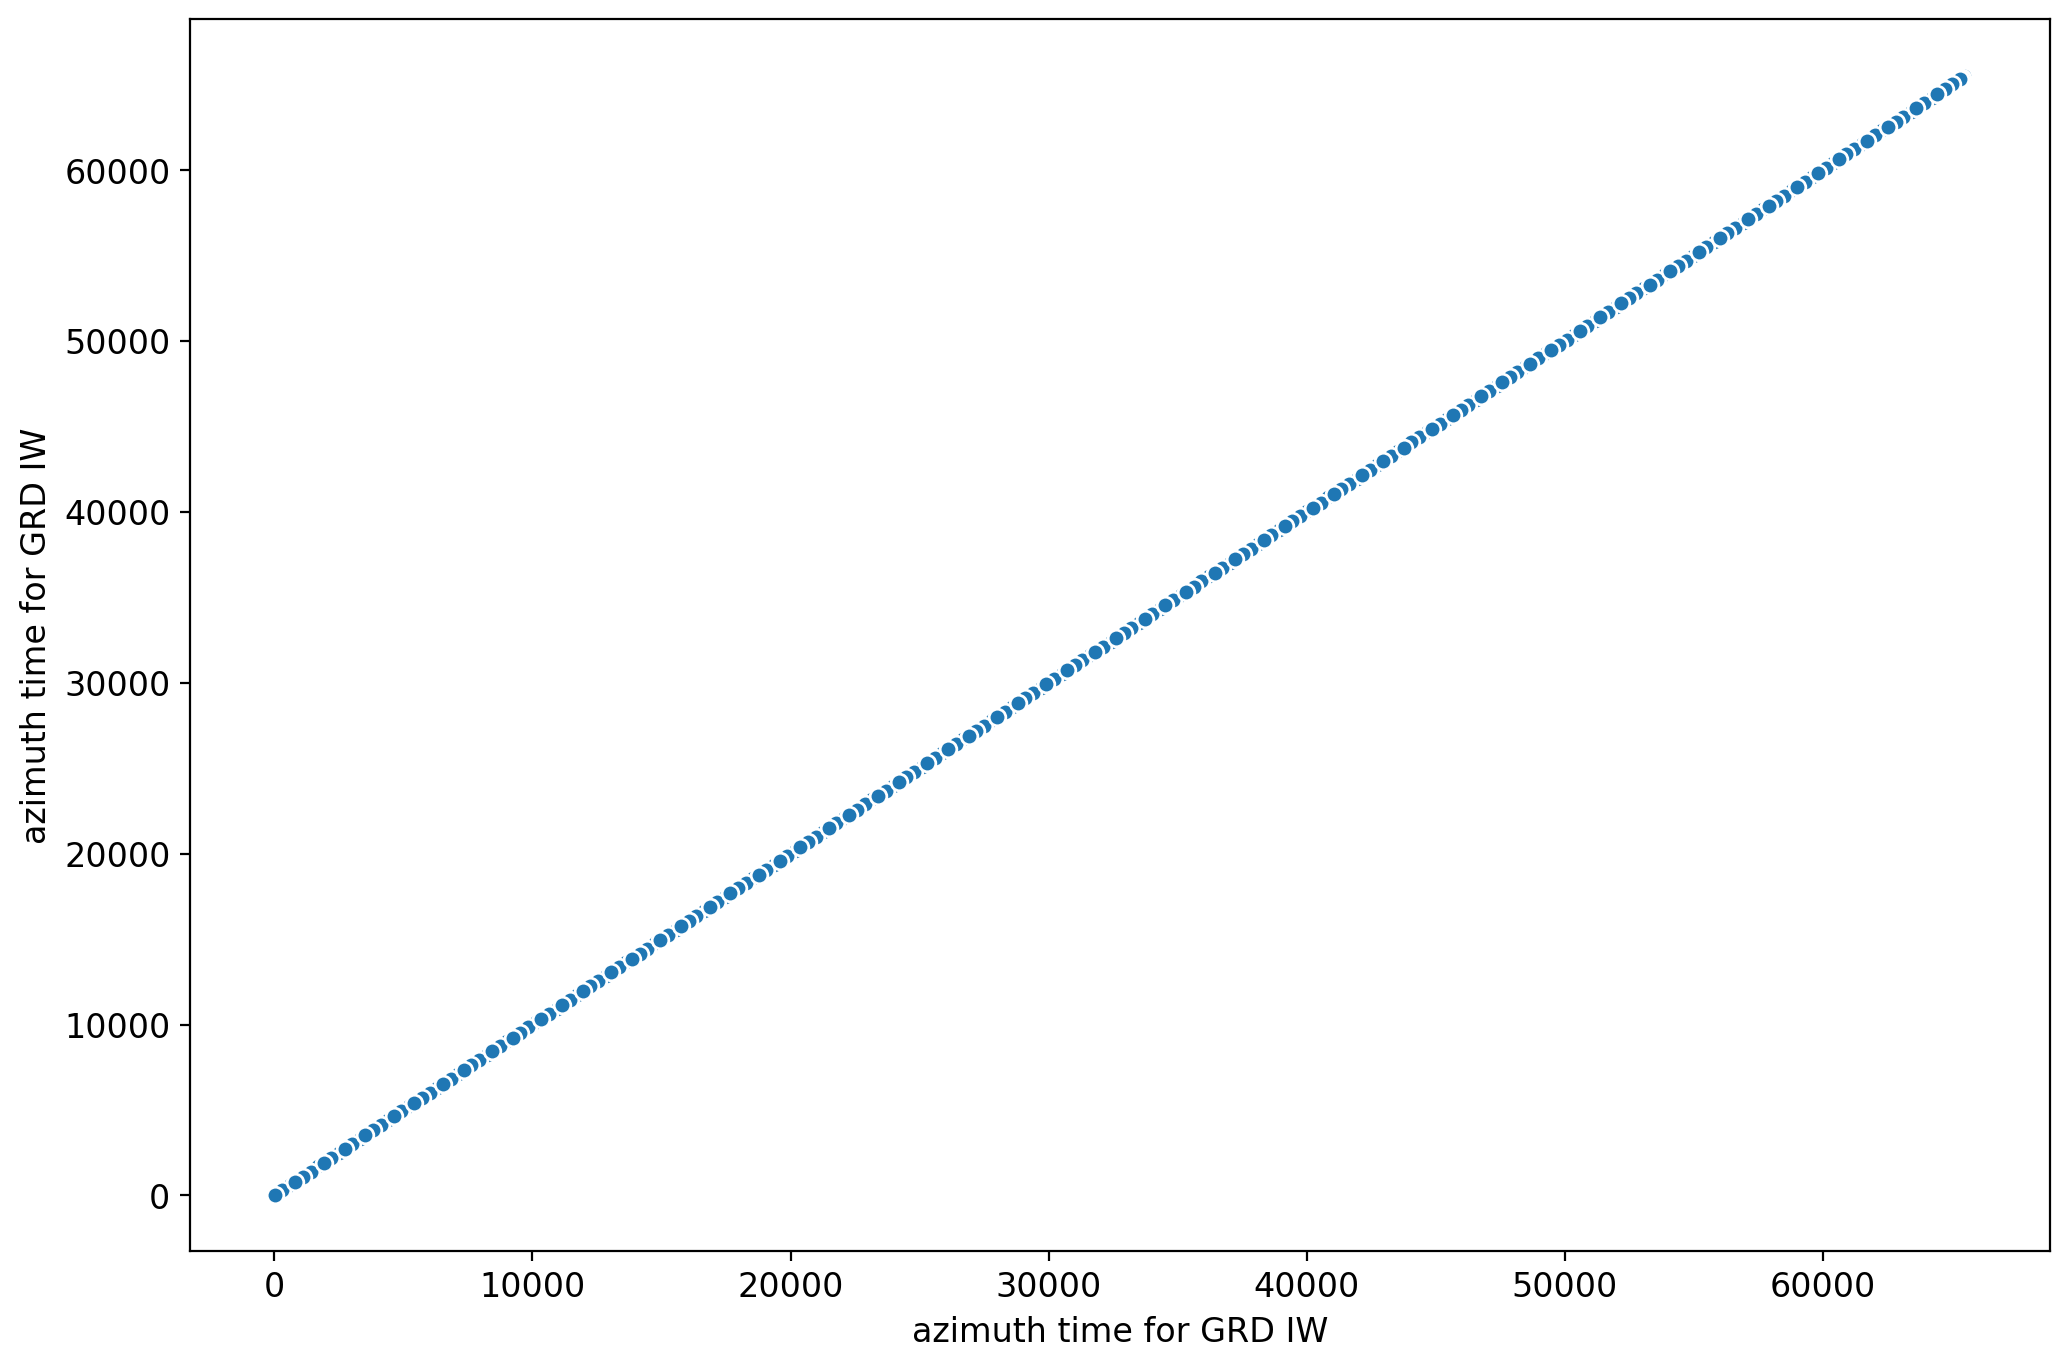

In [25]:
_ = abs(betaNought_block).plot.scatter(y="azimuth_time", vmax=1)

In [26]:
betaNought_block_db = xarray_sentinel.calibrate_intensity(
    measurement_block, calibration.beta_nought, as_db=True
)
betaNought_block_db

<xarray.Dataset> Size: 2GB
Dimensions:       (azimuth_time: 16679, ground_range: 26612)
Coordinates:
  * azimuth_time  (azimuth_time) uint16 33kB 52568 44137 35707 ... 35334 26904
Dimensions without coordinates: ground_range
Data variables:
    grd           (azimuth_time, ground_range) float32 2GB dask.array<chunksize=(5043, 26612), meta=np.ndarray>
Attributes:
    long_name:  beta nought calibration vector (this array contains the count...
    units:      dB

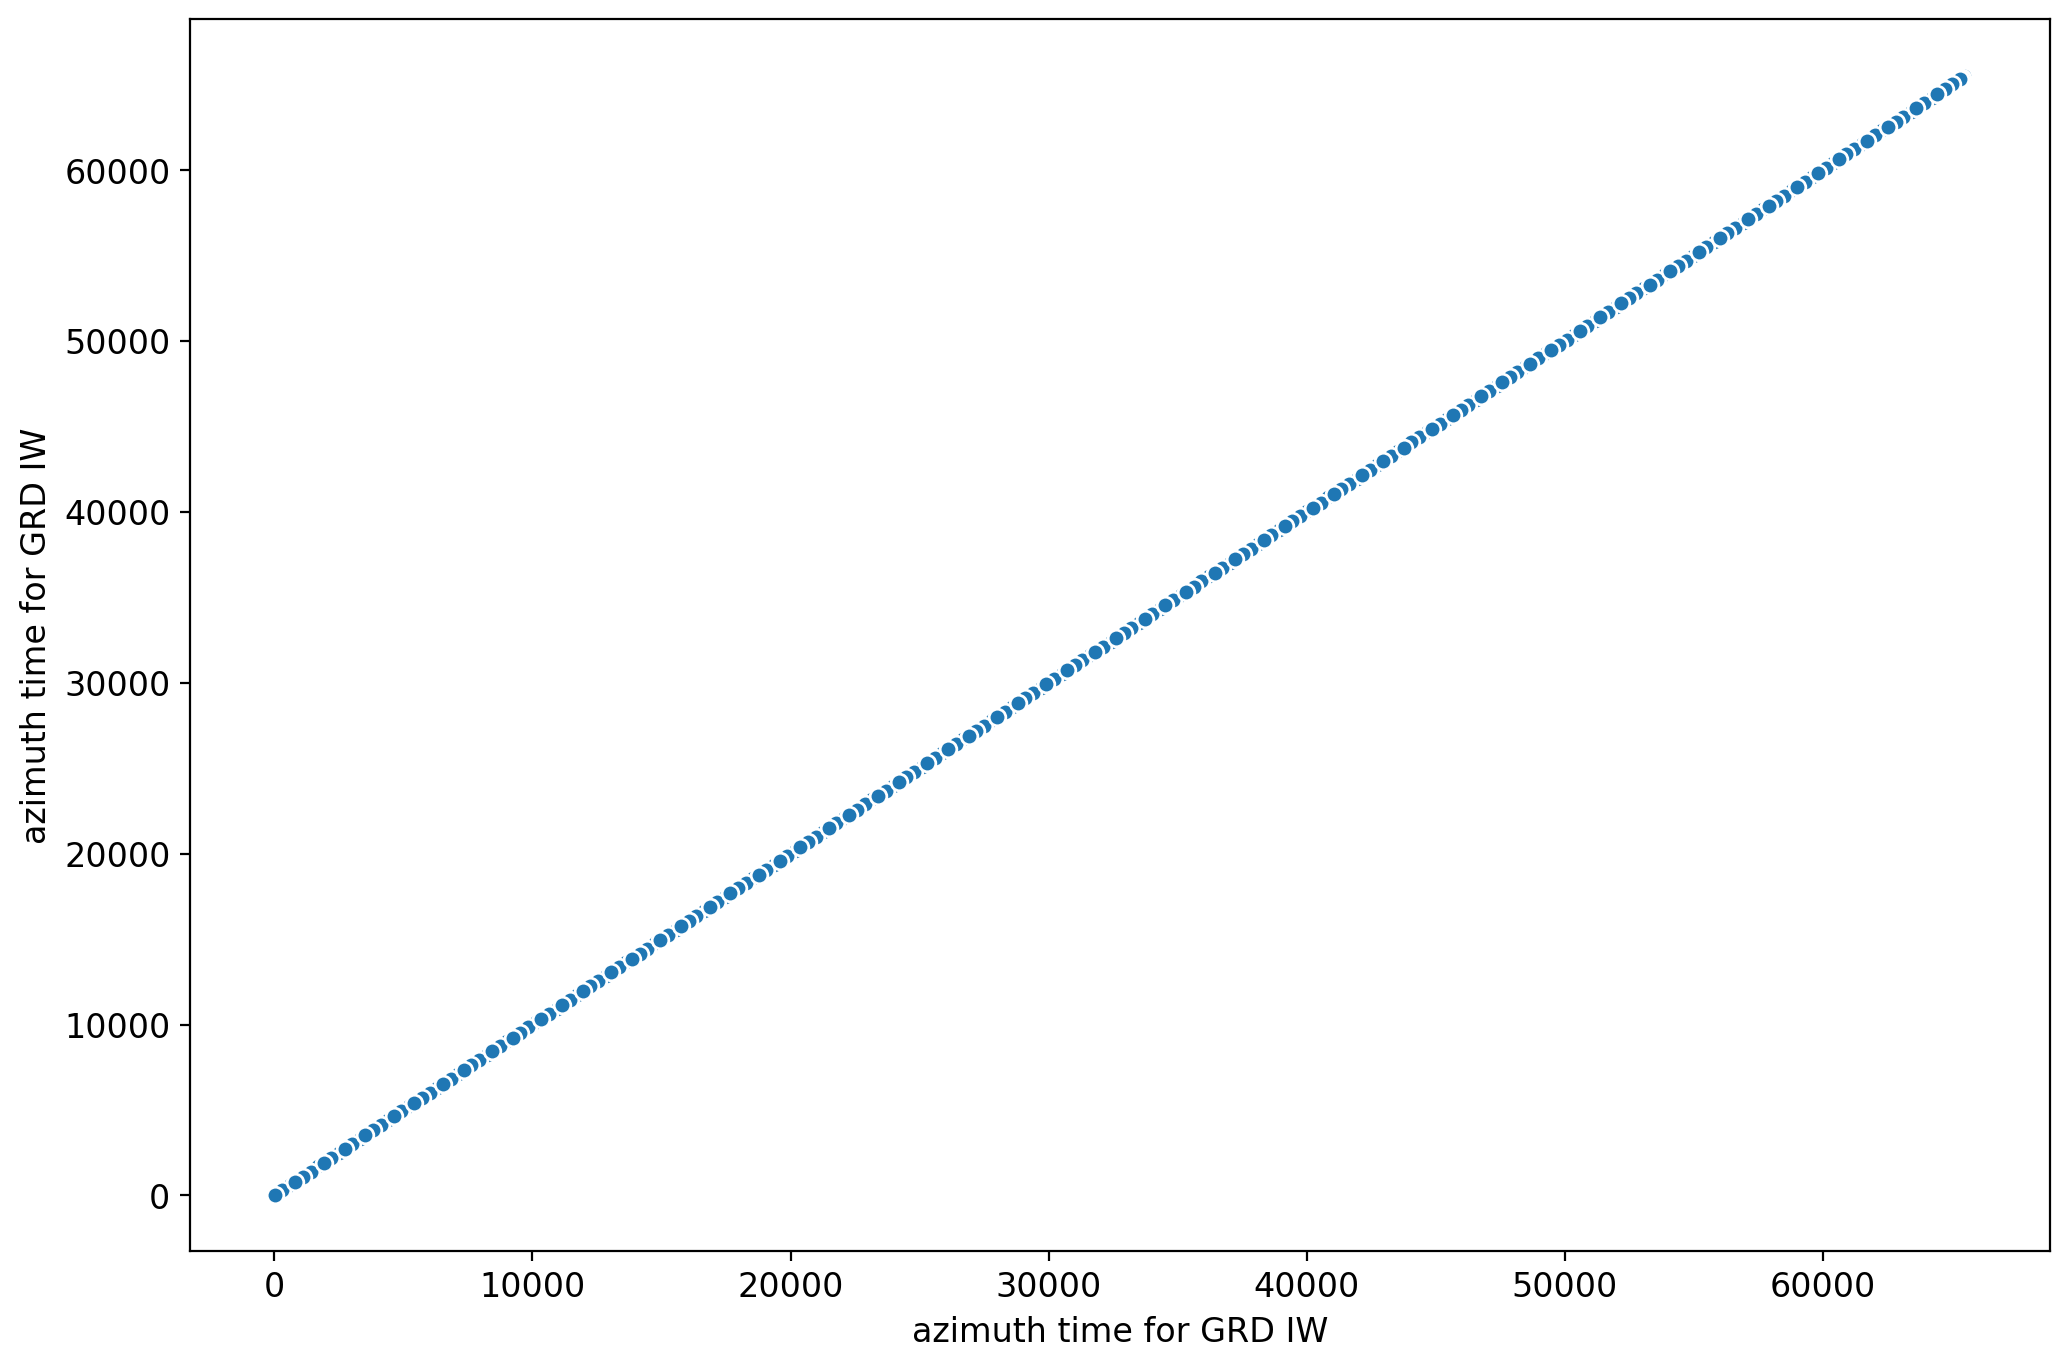

In [28]:
_ = betaNought_block_db.plot.scatter(y="azimuth_time", vmin=-20, vmax=5)
# _ = noise_range.number_of_noise_lines.plot(x="azimuth_time")

In [80]:
#noise_range = xr.open_dataset(
#    product_path, engine="sentinel-1", group=f"{swath_polarisation_group}/noise_range"
#)
#noise_range

In [29]:
noise_range = dt["/S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/quality/noise"].to_dataset()
noise_range

<xarray.Dataset> Size: 8kB
Dimensions:                        (azimuth_time: 471)
Coordinates:
  * azimuth_time                   (azimuth_time) datetime64[ns] 4kB 2025-06-...
Data variables:
    noise_power_correction_factor  (azimuth_time) float32 2kB dask.array<chunksize=(471,), meta=np.ndarray>
    number_of_noise_lines          (azimuth_time) uint32 2kB dask.array<chunksize=(471,), meta=np.ndarray>

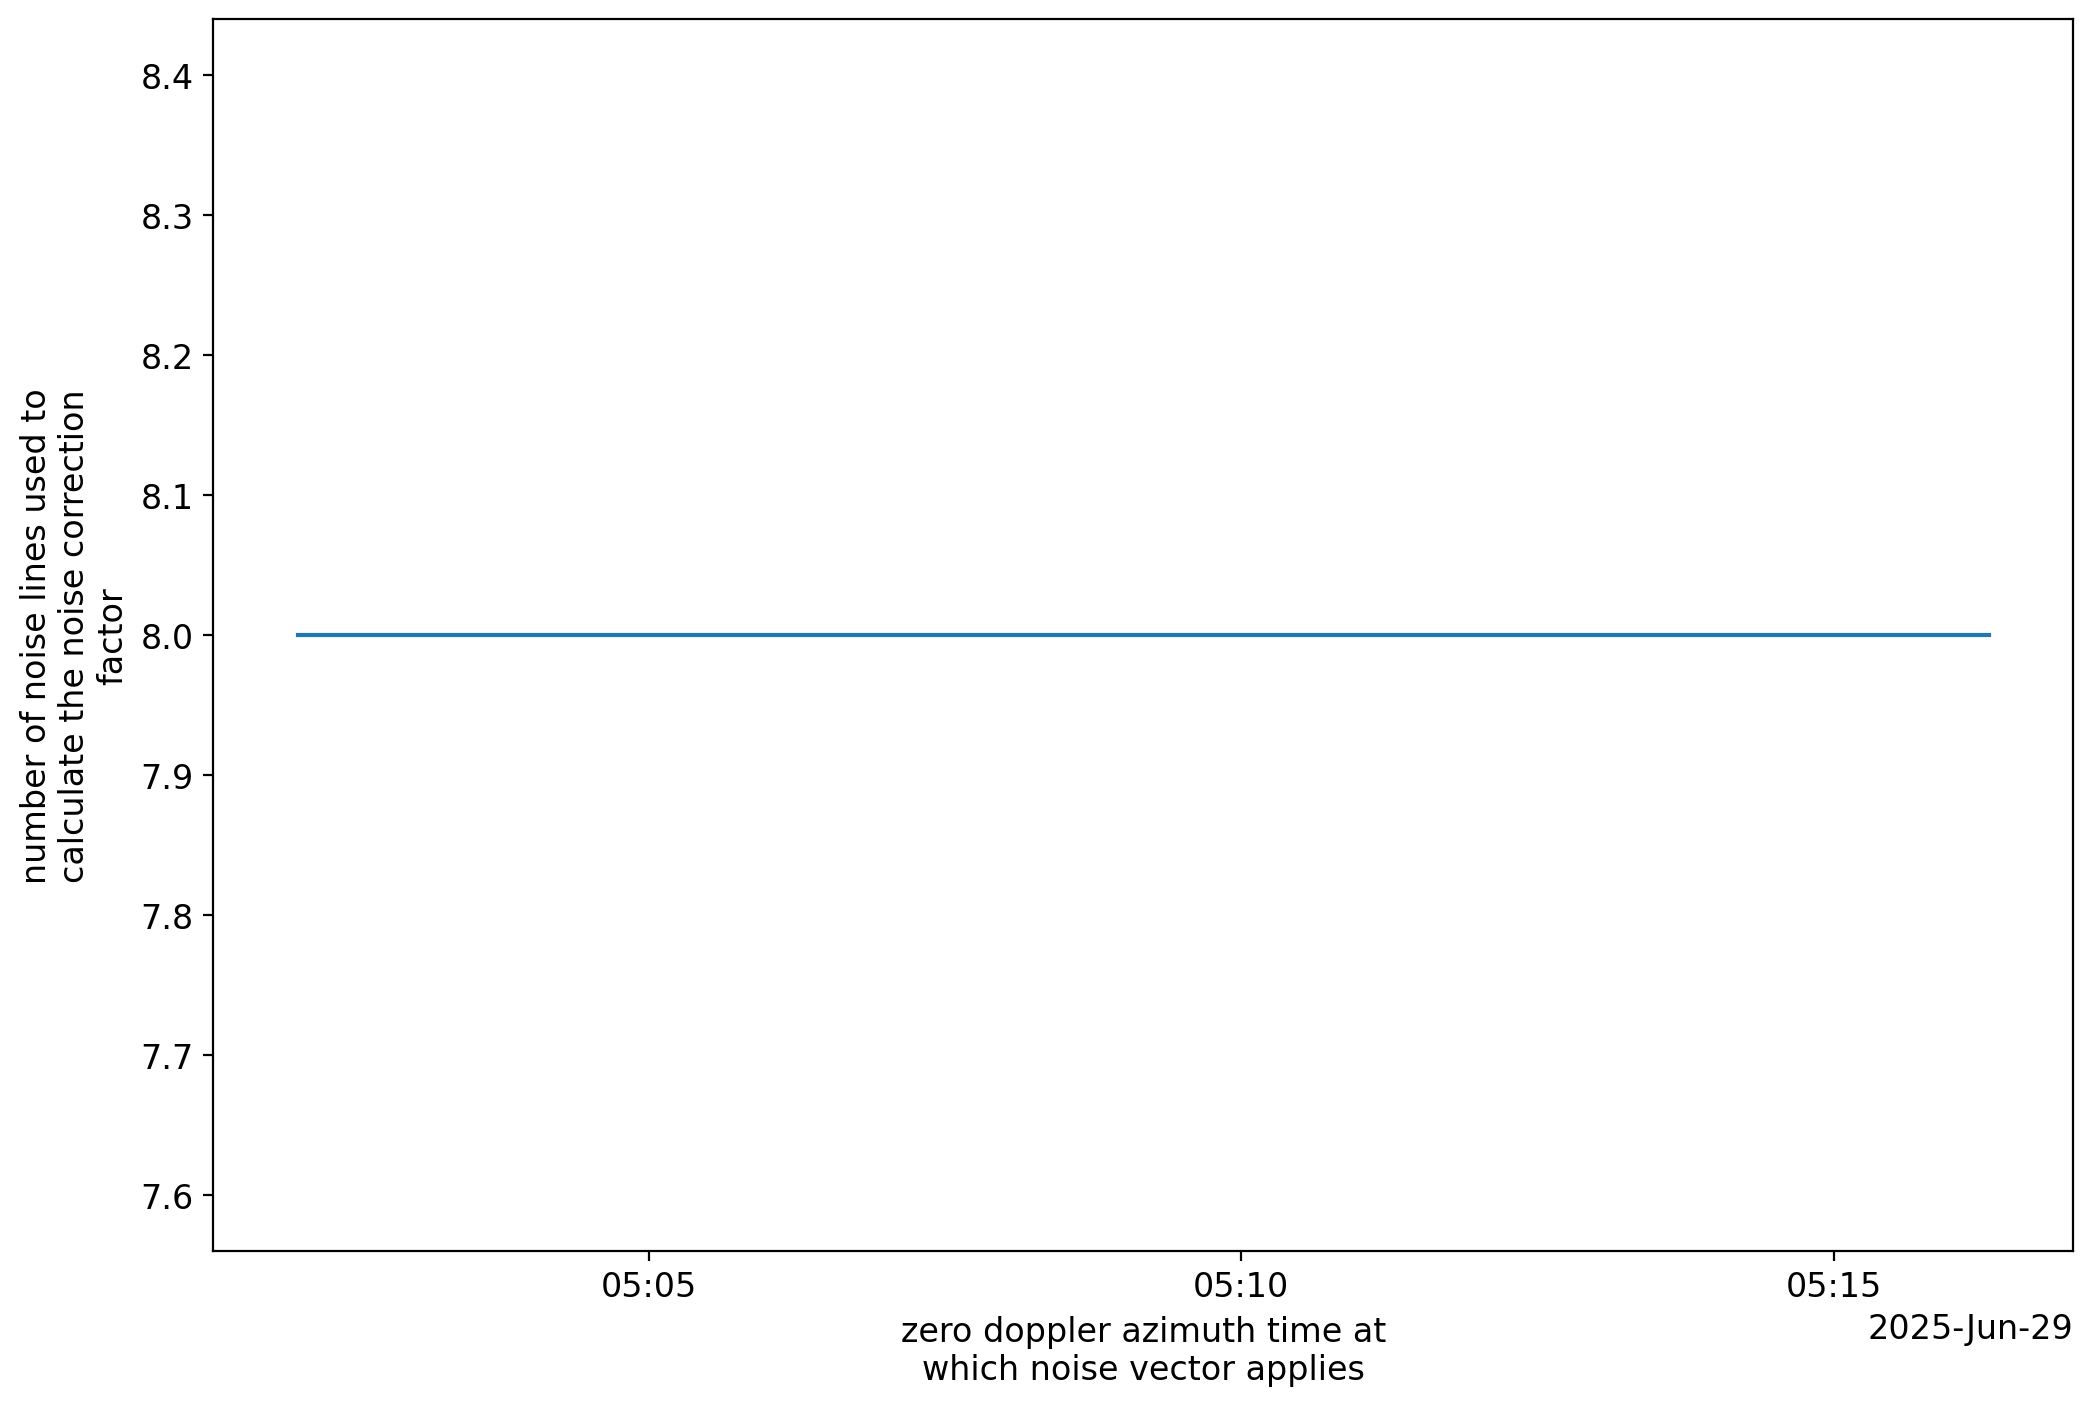

In [30]:
_ = noise_range.number_of_noise_lines.plot(x="azimuth_time")

In [93]:
# noise_azimuth = xr.open_dataset(
#     product_path, engine="sentinel-1", group=f"{swath_polarisation_group}/noise_azimuth"
# )
# noise_azimuth

In [94]:
# _ = noise_azimuth.plot.scatter(x="line", y="noiseAzimuthLut")

In [31]:
coordinate_conversion = dt["/S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions/coordinate_conversion"].to_dataset()
coordinate_conversion

<xarray.Dataset> Size: 5kB
Dimensions:            (azimuth_time: 28, degree: 9)
Coordinates:
  * azimuth_time       (azimuth_time) datetime64[ns] 224B 2025-06-29T05:10:49...
Dimensions without coordinates: degree
Data variables:
    gr0                (azimuth_time) float64 224B dask.array<chunksize=(28,), meta=np.ndarray>
    grsr_coefficients  (azimuth_time, degree) float64 2kB dask.array<chunksize=(28, 9), meta=np.ndarray>
    slant_range_time   (azimuth_time) float64 224B dask.array<chunksize=(28,), meta=np.ndarray>
    sr0                (azimuth_time) float64 224B dask.array<chunksize=(28,), meta=np.ndarray>
    srgr_coefficients  (azimuth_time, degree) float64 2kB dask.array<chunksize=(28, 9), meta=np.ndarray>

In [103]:
# xr.open_dataset(
#     product_path, engine="sentinel-1", group=f"{swath_polarisation_group}/attitude"
# )

In [32]:
attitude = dt["/S01SIWGRD_20250629T051050_0025_C017_2985_006192_VH/conditions/attitude"].to_dataset()
attitude

<xarray.Dataset> Size: 2kB
Dimensions:       (azimuth_time: 25)
Coordinates:
  * azimuth_time  (azimuth_time) datetime64[ns] 200B 2025-06-29T05:10:51.0000...
Data variables:
    pitch         (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
    q0            (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
    q1            (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
    q2            (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
    q3            (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
    roll          (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
    wx            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
    wy            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
    wz            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
    yaw           (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>

In [105]:
# xr.open_dataset(
#     product_path, engine="sentinel-1", group=f"{swath_polarisation_group}/dc_estimate"
# )

In [106]:
# xr.open_dataset(
#     product_path,
#     engine="sentinel-1",
#     group=f"{swath_polarisation_group}/azimuth_fm_rate",
# )